[1.3676018e-01 2.7764048e-02 1.6662547e-01 1.4367479e+00 2.9279703e+02]
MAE:2.18425537109375,RMSE:2.727282154106984


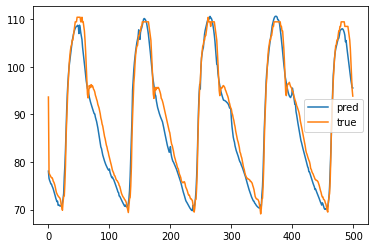

MAE:2.35670458984375,RMSE:2.7929734748839596


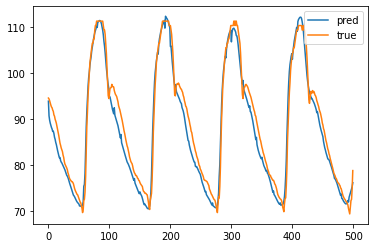

MAE:2.70126025390625,RMSE:3.231295649873106


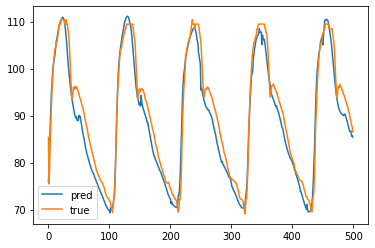

MAE:2.609259765625,RMSE:3.067624181264907


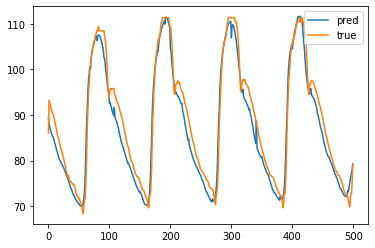

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
df_raw = pd.read_csv('F:\Recurrence_code\FEDformer_zsy\data\BP.csv')

cols = list(df_raw.columns)
cols.remove('aortic')
cols.remove('date')
df_raw = df_raw[['date'] + cols + ['aortic']]
# print(cols)
num_train = int(len(df_raw) * 0.7)
num_test = int(len(df_raw) * 0.2)
num_vali = len(df_raw) - num_train - num_test
border1s = [0, num_train+1, len(df_raw) - num_test]
border2s = [num_train, num_train + num_vali, len(df_raw)]
border1 = border1s[2]
border2 = border2s[2]

df_data = df_raw['radial']
df_datay = df_raw['aortic']

train_data = df_data[border1:border2]
scaler.fit(train_data.values.reshape(-1,1))
datax = scaler.transform(df_data.values.reshape(-1,1))
# print('radial的均值为：{}\n radial的标准差为：{}'.format(self.scaler.mean_,np.sqrt(self.scaler.var_)))

# target
train_data = df_datay[border1:border2]
scaler.fit(train_data.values.reshape(-1,1))
datay = scaler.transform(df_datay.values.reshape(-1,1))
# print('aortic的均值为：{}\n aortic的标准差为：{}'.format(self.scaler.mean_,np.sqrt(self.scaler.var_)))


mertrics = np.load('metrics.npy')
print(mertrics)
# mse:0.019240623340010643, mae:0.09517072141170502
pred = np.load('pred.npy')
true = np.load('true.npy')

true = scaler.inverse_transform(true.flatten().reshape(1, -1)) # 逆标准化
pred = scaler.inverse_transform(pred.flatten().reshape(1, -1))
true = true.reshape(2240, 500, 1)
pred = pred.reshape(2240, 500, 1)


k = 0
for i, j in zip(pred, true):
    k=k+1
    if k % 500 == 0:
        MAE = np.linalg.norm(i-j, ord=1)/len(i)
        RMSE = np.linalg.norm(i-j, ord=2)/len(i)**0.5
        print('MAE:{},RMSE:{}'.format(MAE,RMSE))
        plt.plot(i)
        plt.plot(j)
        plt.legend(['pred','true'])
        plt.show()

[9.8473036e-01 1.5237150e+00 1.2343885e+00 5.4374590e+00 3.8785234e+03]


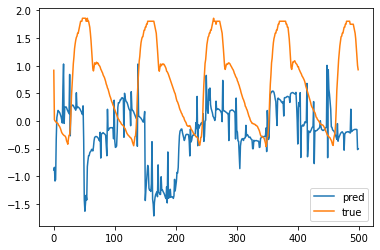

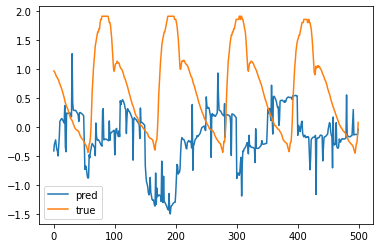

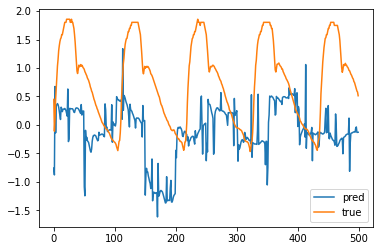

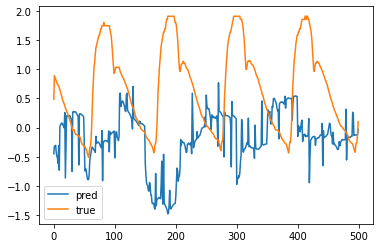

In [8]:
mertrics = np.load('best_metrics.npy')
print(mertrics)
pred = np.load('best_pred.npy')
true = np.load('best_true.npy')
true.shape

k = 0
for i, j in zip(pred, true):
    k=k+1
    if k % 500 == 0:
        plt.plot(i)
        plt.plot(j)
        plt.legend(['pred','true'])
        plt.show()